In [67]:
# improting required library for EDA analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data and checking

In [68]:
# reading csv file
leads = pd.read_csv('Leads.csv')
leads.shape

(9240, 37)

In [69]:
#Checking date
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Handling incorrect values

In [70]:
# Here select doesnot looks like a valid value and seems to be error.
# Hence converting this value to NaN before checking missing %
leads = leads.replace('Select',np.nan)

In [71]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [72]:
# check columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [73]:
#check numerical data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Handling missing values

In [74]:
# check missing value %
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [75]:
#Lets remove the columns with 40% and more missing values
leads = leads.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [76]:
# check missing value % after elimination of column
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [77]:
#Checking the values where missing % is greater than 20%
# As this is considerable huge number of mising data randomly filling it with average (mean, mode) and twerks the analysis
# Hence looking at the value we would update the values to unknown , others etc

In [78]:
leads["City"].value_counts(normalize=True, dropna=False) * 100

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [79]:
#As 39% of data is missing and 34% are in Mumbai.This is skewed and will not provide insight to analysis. Hence we will drop this column.
leads.drop(['City'], axis = 1, inplace = True)

In [80]:
leads["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [82]:
# We see good distirbution of value in other categories that is approx 67%(100-36), we will fill missing value with Unknown
leads['Specialization'] = leads['Specialization'].fillna(value='UnKnown')
#Check fill value
leads["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
UnKnown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [51]:
leads["Tags"].value_counts(normalize=True, dropna=False) * 100

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [83]:
# 36% of data is missing and others value are skewed to 2 values.
#This will not be help for our analysis hence dropping column.
leads.drop(['Tags'], axis = 1, inplace = True)

In [84]:
leads["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False) * 100

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [86]:
# here also 70% of people has selected 'Better Career Prospects' skewing the data.
# this will not provide us insight. So, dropping the column
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [53]:
leads["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [87]:
# 60% of data is Unemployed and 29% is moissing. However with reference to business context with filed might me usefull.
# Hence filling the value unknowns to missing values
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(value='UnKnown')
# Check fill
leads["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
UnKnown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [88]:
leads["Country"].value_counts(normalize=True, dropna=False) * 100

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

In [89]:
# 96% data is either india or unkonow. hence dropping the column
leads.drop(['Country'], axis = 1, inplace = True)

In [91]:
# again checking the missing values
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Search                                      0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on 

In [99]:
# other columns missing value is less 2 % hence updating it with most occuring value
leads['TotalVisits']=leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0])
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0])
leads['Last Activity']=leads['Lead Source'].fillna(leads['TotalVisits'].mode()[0])
leads['Lead Source']=leads['Lead Source'].fillna(leads['TotalVisits'].mode()[0])
# check missing %
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

# Handling unique value

In [101]:
# Count unique values in each column
leads.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses         1
I agree to pay the amount through cheque       1
Magazine                                       1
Get updates on DM Content                      1
Update me on Supply Chain Content              1
Search                                         2
A free copy of Mastering The Interview         2
Newspaper                                      2
Digital Advertisement                          2
X Education Forums                             2
Newspaper Article                              2
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
Through Recommendations                        2
Lead Origin                                    5
What is your current occupation                7
Last Notable Activity                         16
Specialization                                19
Last Activity                                 22
Lead Source         

In [102]:
leads["Receive More Updates About Our Courses"].value_counts(normalize=True, dropna=False) * 100

Receive More Updates About Our Courses
No    100.0
Name: proportion, dtype: float64

In [103]:
leads["I agree to pay the amount through cheque"].value_counts(normalize=True, dropna=False) * 100

I agree to pay the amount through cheque
No    100.0
Name: proportion, dtype: float64

In [104]:
leads["Magazine"].value_counts(normalize=True, dropna=False) * 100

Magazine
No    100.0
Name: proportion, dtype: float64

In [105]:
leads["Get updates on DM Content"].value_counts(normalize=True, dropna=False) * 100

Get updates on DM Content
No    100.0
Name: proportion, dtype: float64

In [107]:
leads["Update me on Supply Chain Content"].value_counts(normalize=True, dropna=False) * 100

Update me on Supply Chain Content
No    100.0
Name: proportion, dtype: float64

In [109]:
#Droping the above column as it has only one value and will not be required for analysis
# Columns to be dropeed
columns_to_drop = ['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine','Get updates on DM Content','Update me on Supply Chain Content']

# Droping required columns
leads.drop(columns=columns_to_drop, inplace=True)

# recheck unique values
leads.nunique().sort_values(ascending=True)

Through Recommendations                      2
Digital Advertisement                        2
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Newspaper                                    2
X Education Forums                           2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Search                                       2
Lead Origin                                  5
What is your current occupation              7
Last Notable Activity                       16
Specialization                              19
Last Activity                               22
Lead Source                                 22
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1731
Lead Number                               9240
Prospect ID                               9240
dtype: int64

# Handling Numerical Outlier

In [111]:
numerical_columns = leads.select_dtypes(include=['number']).columns
numerical_columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

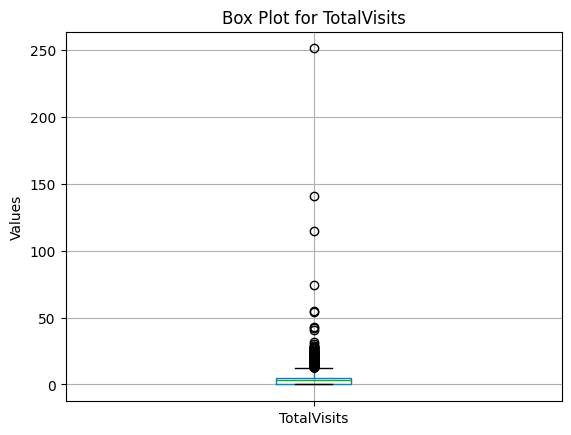

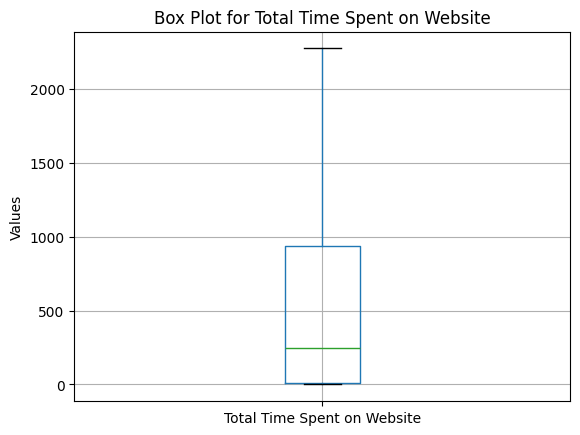

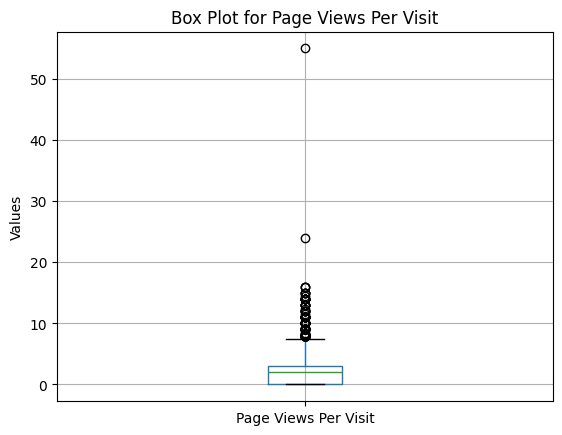

In [118]:
columns_to_plot = [ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
for column in columns_to_plot:
    plt.figure()
    leads.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

In [127]:
# 'Page Views Per visit' and 'Total Visits' has outlier
outlier_column = ['Total Time Spent on Website', 'Page Views Per Visit']
leads[outlier_column].describe(percentiles=[.10,.25,.50,.75,.95])


,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000
mean,487.698268,2.327787
std,548.021466,2.164258
min,0.000000,0.000000
10%,0.000000,0.000000
25%,12.000000,0.000000
50%,248.000000,2.000000
75%,936.000000,3.000000
95%,1562.000000,6.000000
max,2272.000000,55.000000


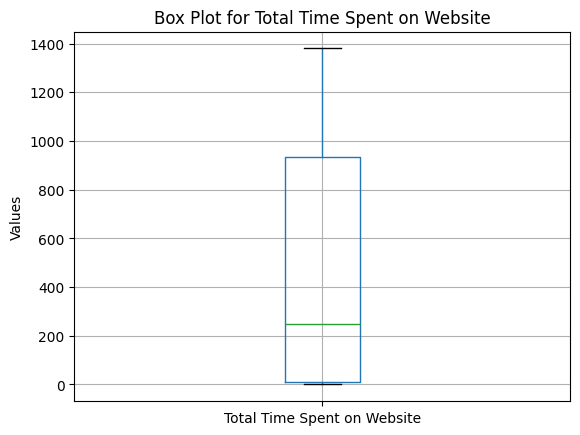

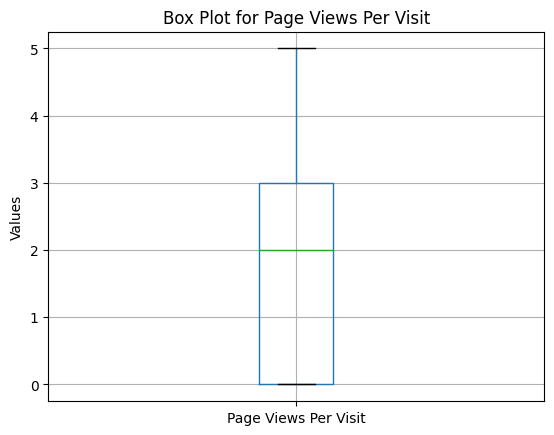

In [129]:
for column in outlier_column:
    # Calculate the 10th and 90th percentiles
    lower_bound = leads[column].quantile(0.10)
    upper_bound = leads[column].quantile(0.90)

    # Cap the outliers
    leads[column] = leads[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
#Recheck Outlier
for column in outlier_column:
    plt.figure()
    leads.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# handling ambigious data and dropping required column

In [133]:
categorical_columns = leads.select_dtypes(include=['object']).columns

# fetch unique values and its count
values_counts = {col: leads[col].value_counts() for col in categorical_columns}

# Print the unique values and their counts for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Unique values and counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Unique values and counts for column 'Lead Source':
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference      

In [135]:
# We see fields "Lead Source" and "Last Activity" with incorrect value google. Handling that.
leads['Lead Source'] = leads['Lead Source'].replace("google","Google")
leads['Last Activity'] = leads['Last Activity'].replace("google","Google")

In [137]:
# Also dropping column 'Prospect ID' as it is unique identifier
leads.drop(['Prospect ID'], axis = 1, inplace = True)

In [139]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,Olark Chat,UnKnown,Unemployed,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,Organic Search,UnKnown,Unemployed,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1380.0,2.0,Direct Traffic,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Direct Traffic,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1380.0,1.0,Google,UnKnown,Unemployed,No,No,No,No,No,No,No,Modified


# EDA Analysis

Univariate Catergorical Analysis

In [165]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()

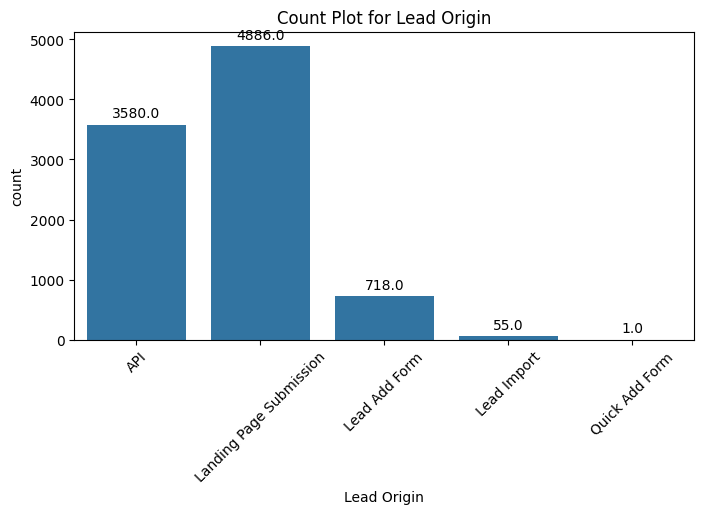

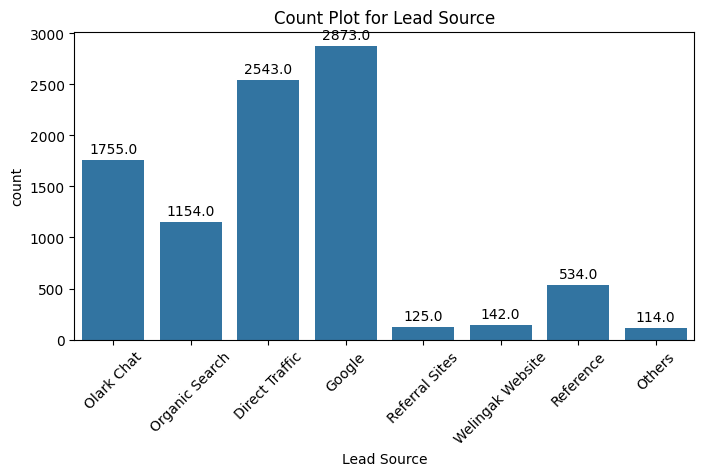

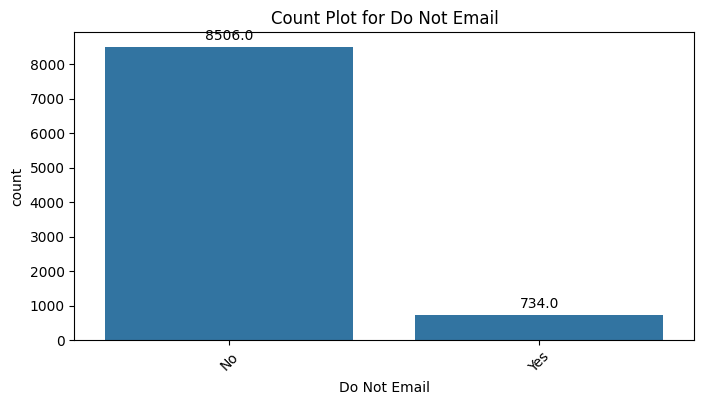

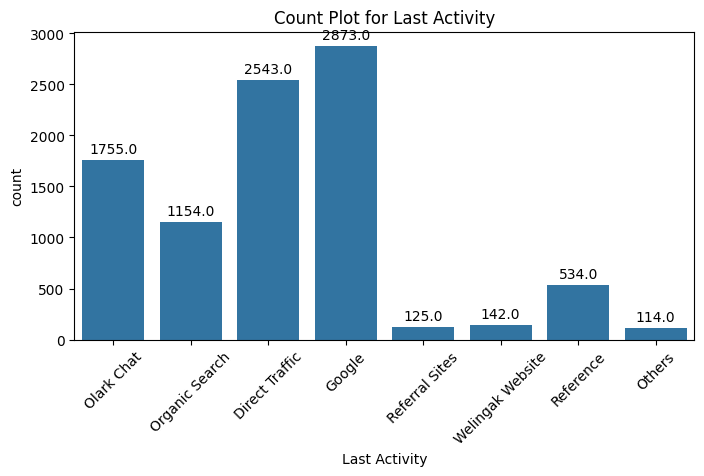

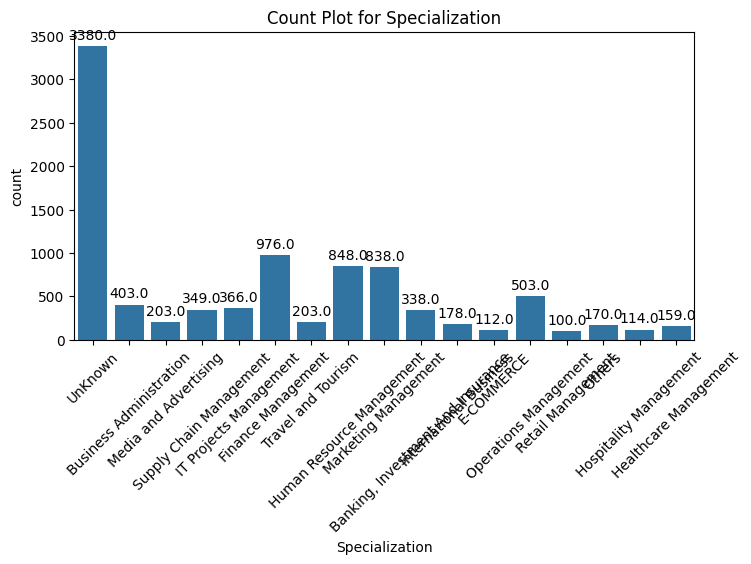

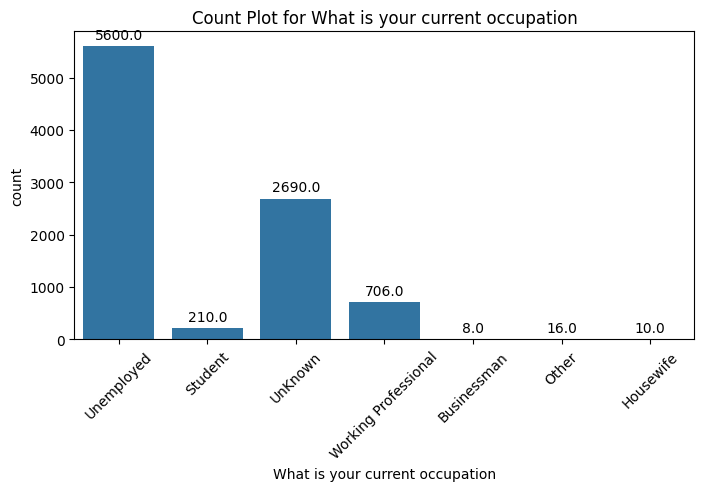

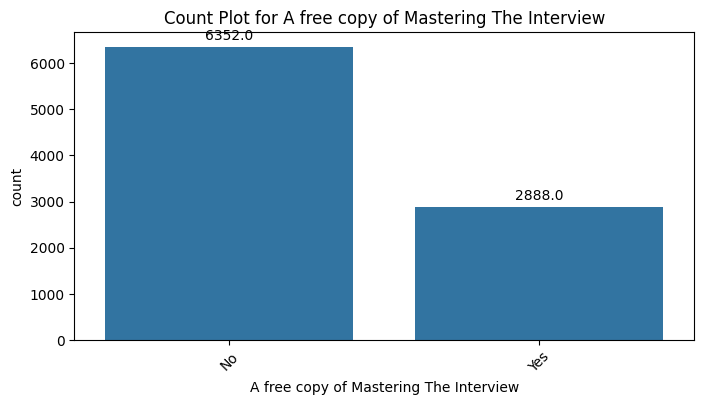

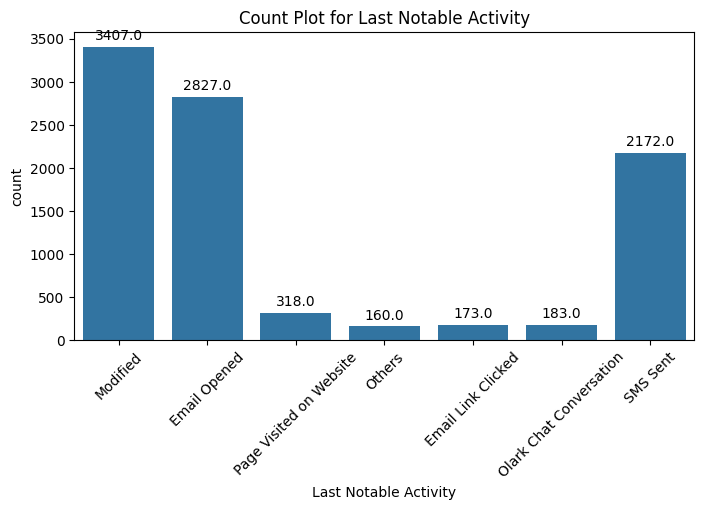

In [167]:
# Plot count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=leads)
    plt.title(f'Count Plot for {col}')
    
    # Rotate x-axis labels to be diagonal
    plt.xticks(rotation=45)
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.show()

In [147]:
# we note some categorical column are skewed. handling those by dropping column and updating value

# Fetch unique values and their counts as percentages
values_counts = {col: (leads[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Lead Source':
Lead Source
Google               31.09
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
0.0                   0.39
bing                  0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Do Not Email':
Do Not Email
No     

In [148]:
# Deleting the reqired column with skewed value less than 5%. 
#Columns: 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',Through Recommendations'
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Dropping columns
leads = leads.drop(columns=columns_to_drop)

In [149]:
# categorising the value to other with less than 1% of data
# Columns: 'Lead Source','Last Activity','Specialization','Last Notable Activity':
categorical_columns=['Lead Source','Last Activity','Specialization','Last Notable Activity']
for col in categorical_columns:
    value_counts = leads[col].value_counts(normalize=True) * 100
    values_to_update = value_counts[value_counts < 1].index
    leads[col] = leads[col].apply(lambda x: 'Others' if x in values_to_update else x)

In [150]:
# Re - Fetch unique values and their counts as percentages
values_counts = {col: (leads[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Source':
Lead Source
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Last Activity':
Last Activity
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Specialization':
Specialization
UnKnown                              36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain M

Bivariate Catergorical Analysis

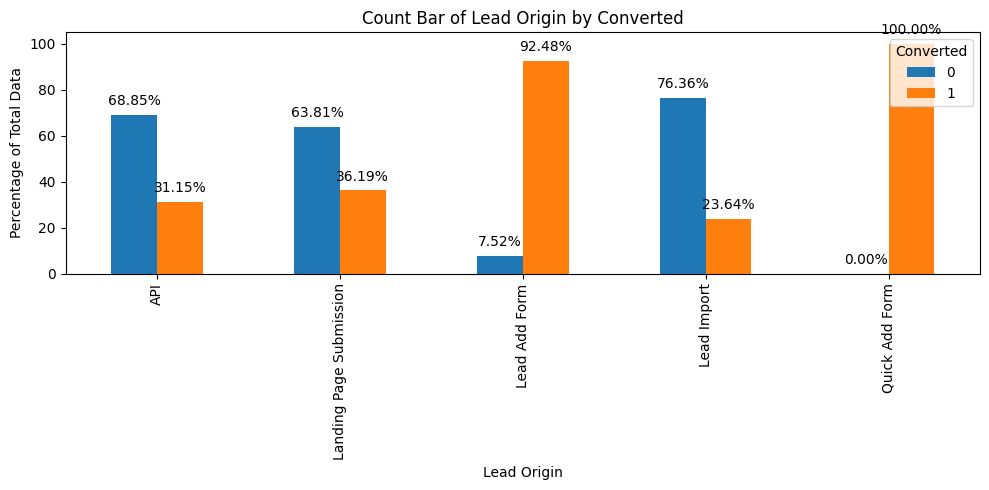

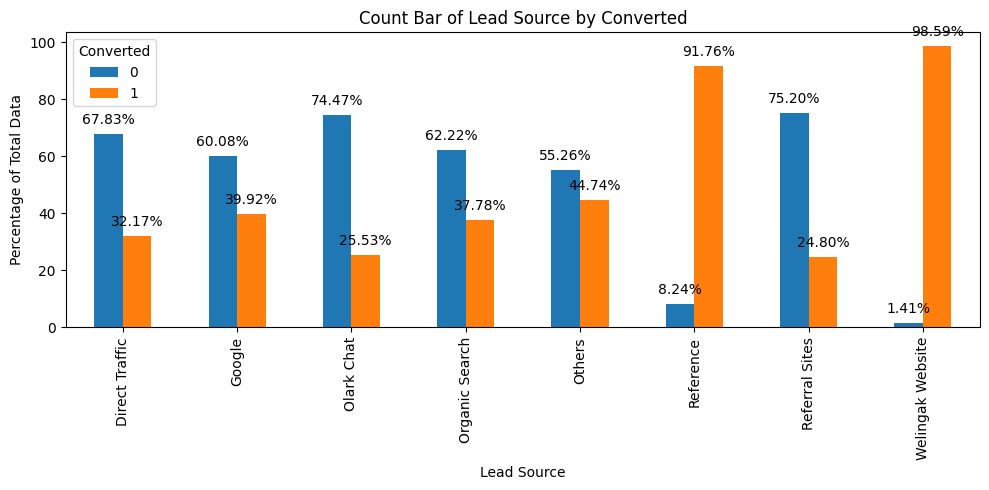

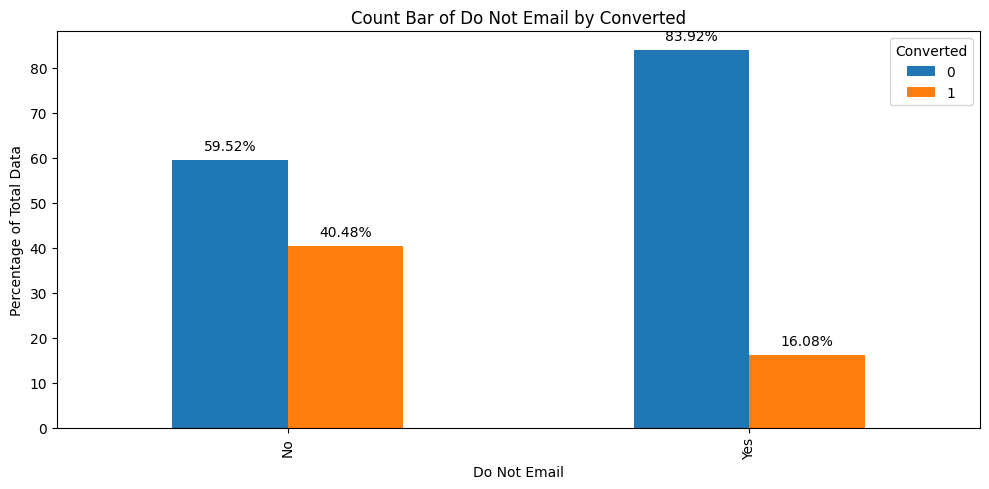

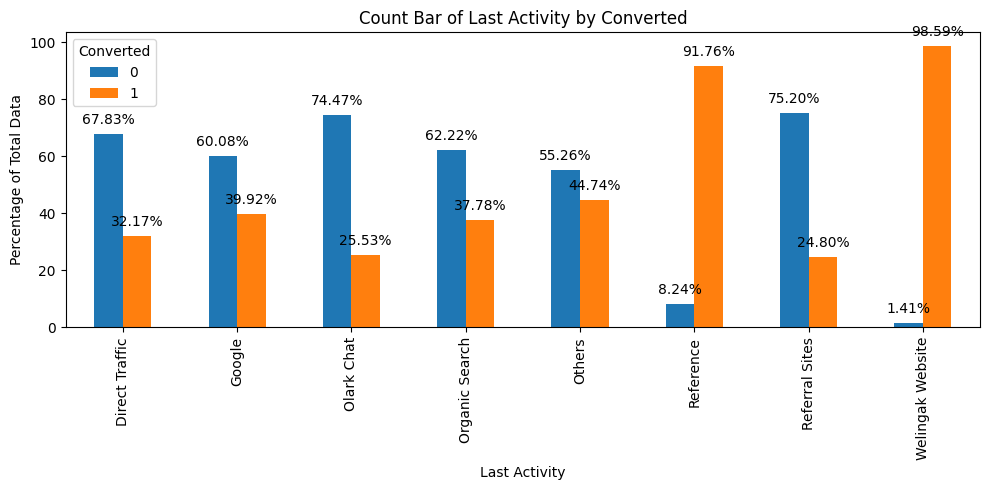

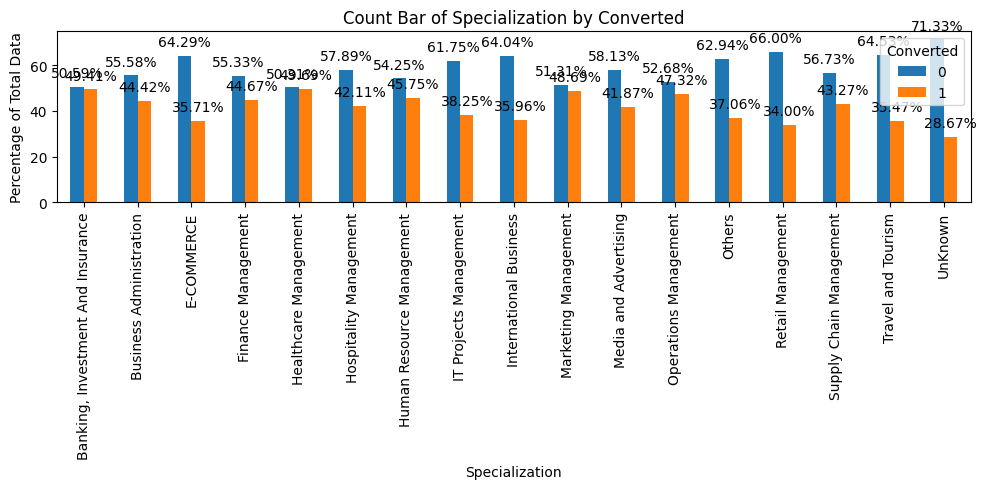

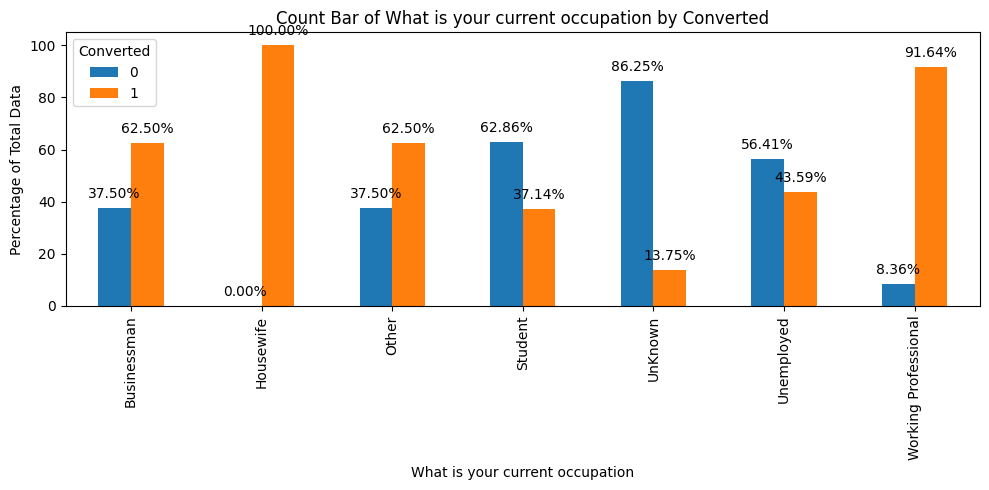

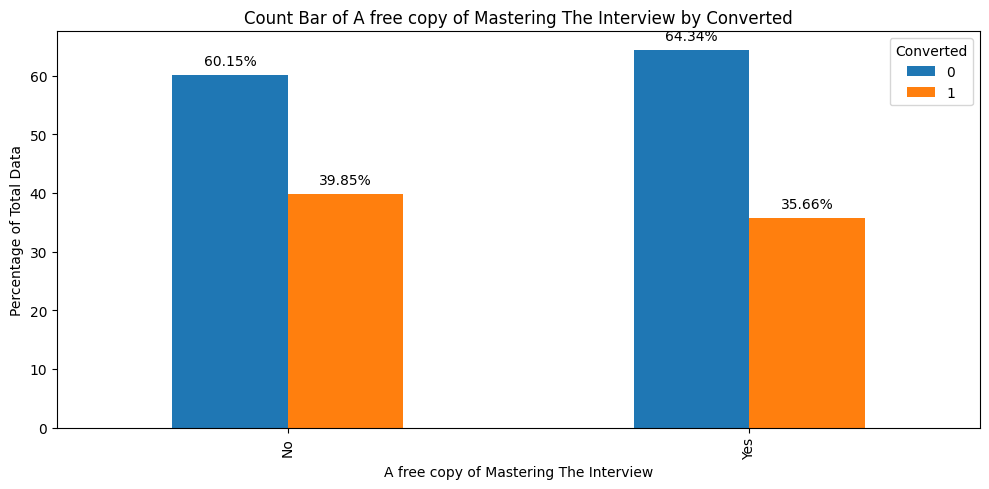

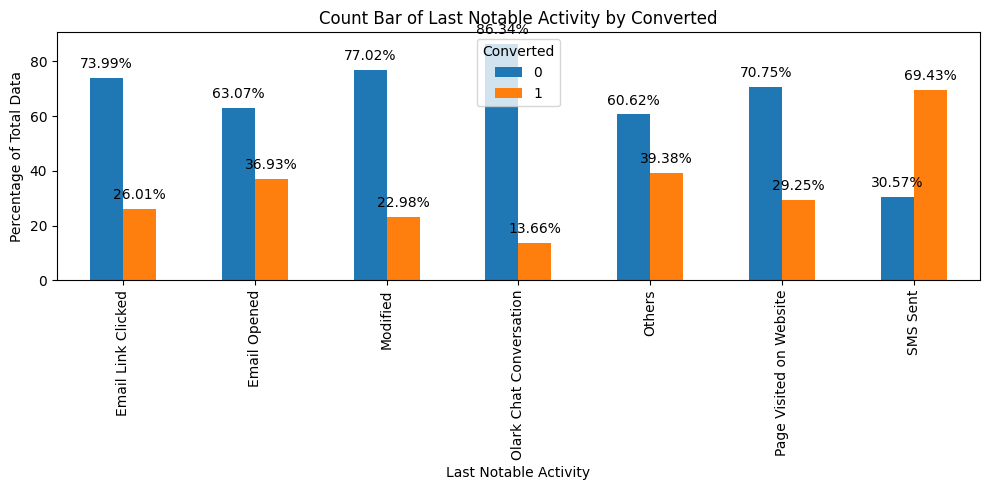

In [176]:
categorical_columns = leads.select_dtypes(include=['object']).columns

# Plot count bar for each categorical column using 'Converted' column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    crosstab = pd.crosstab(leads[col], leads['Converted'])
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    ax = crosstab_percentage.plot(kind='bar', ax=plt.gca())
    plt.title(f'Count Bar of {col} by Converted')
    plt.xlabel(col)
    plt.ylabel('Percentage of Total Data')
    
    # Add data labels in percentage of total data
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


Numerical Columns:

In [162]:
numerical_columns = leads.select_dtypes(include=['number']).columns
leads[numerical_columns].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,465.761905,2.158517
std,23405.995698,0.486714,4.836682,502.991985,1.672716
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,1380.000000,5.000000


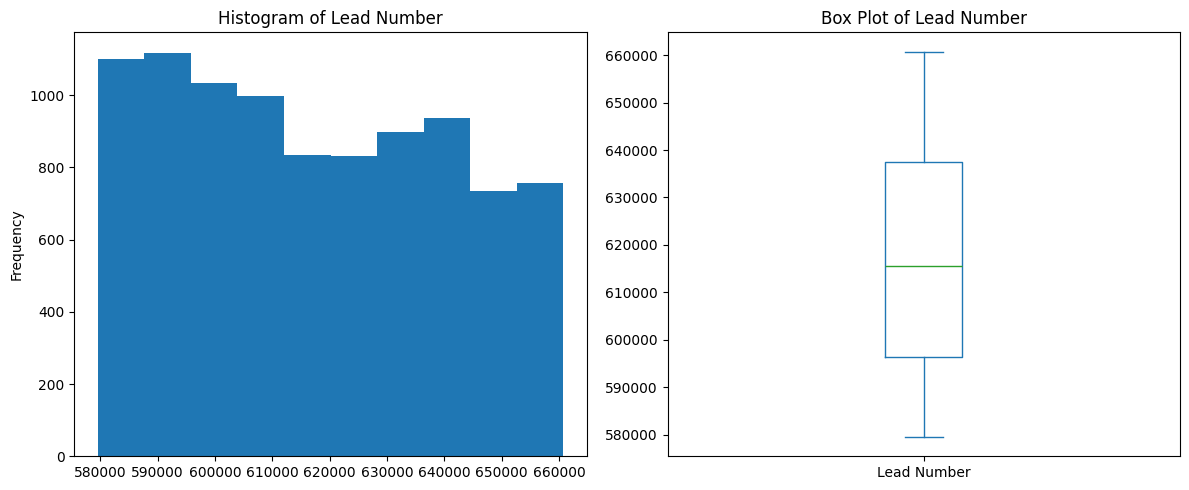

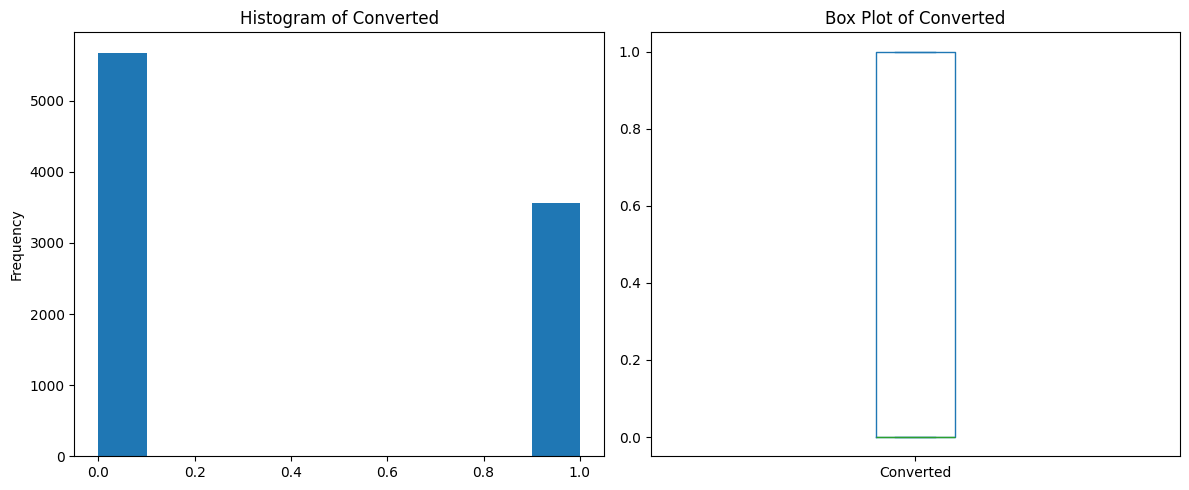

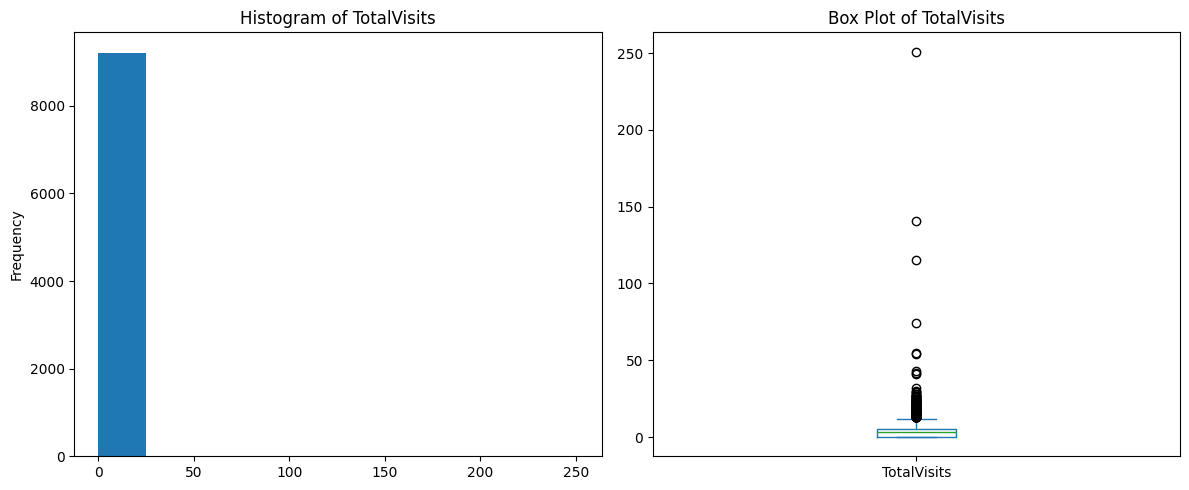

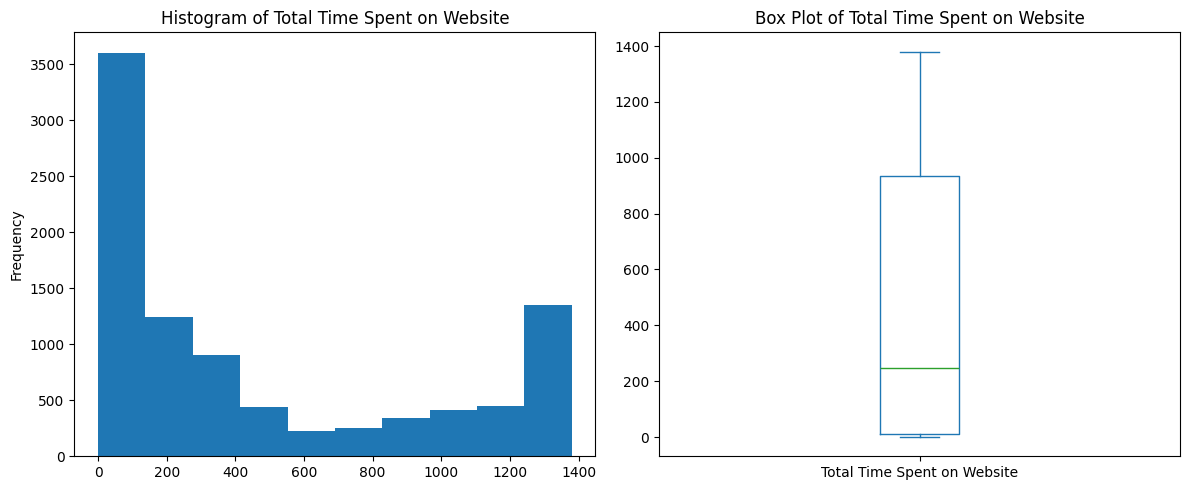

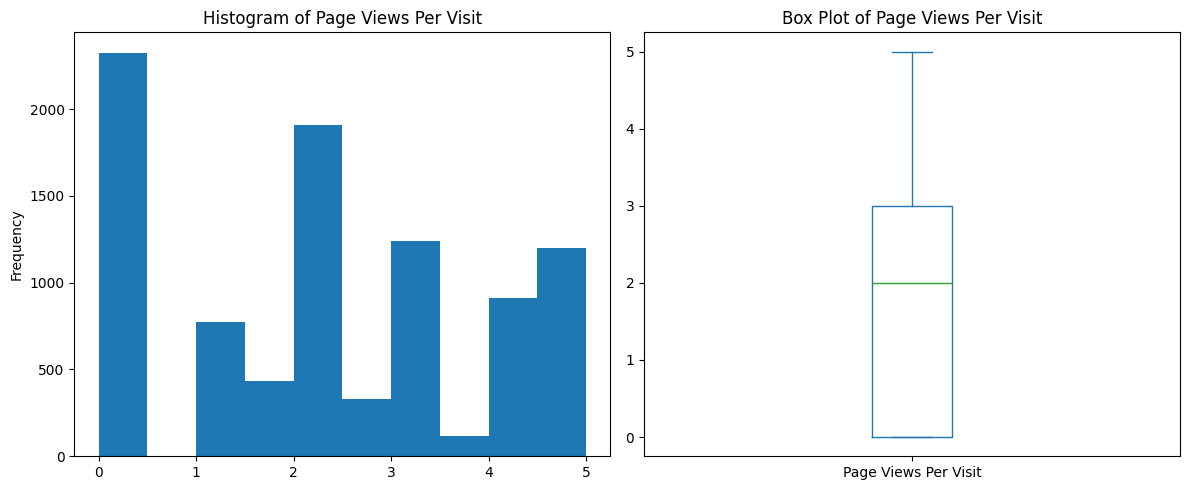

In [164]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram
    leads[col].plot(kind='hist', ax=axes[0], title=f'Histogram of {col}')
    
    # Box plot
    leads[col].plot(kind='box', ax=axes[1], title=f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()